In [1]:
import numpy as np
import pandas as pd

# visualization Library/tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# machine learning algorith
from sklearn.linear_model import LogisticRegression
from sklearn import svm 
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



from scipy.stats import randint as sp_randint

In [2]:
# import scikit tools to read boston dataset
test = pd.read_csv('Test.csv')
train = pd.read_csv('Train.csv')


In [3]:
#Preview test
test.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50
0,Apcnt_1000032,3236.0,0.34875,10.2006,0.0000,0.0,418564.0,418564.0,418564.0,540710.0,...,NaN,0.825000,1.01,0.800000,NaN,0.0,charge,NaN,0.000000,0.011221
1,Apcnt_1000048,3284.0,1.27360,2.9606,9.0198,0.0,0.0,9858816.0,49014.0,1510098.0,...,18.8415,0.507694,4.04,0.623248,1.0,0.0,lending,NaN,0.504974,0.043525
2,Apcnt_1000052,NaN,0.27505,0.0600,0.0000,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.00,NaN,NaN,NaN,charge,NaN,0.000000,NaN


In [4]:
train.head(3)

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.80573,1.620483,0.322436,no
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes


In [5]:
train.columns

Index(['Applicant_ID', 'form_field1', 'form_field2', 'form_field3',
       'form_field4', 'form_field5', 'form_field6', 'form_field7',
       'form_field8', 'form_field9', 'form_field10', 'form_field11',
       'form_field12', 'form_field13', 'form_field14', 'form_field15',
       'form_field16', 'form_field17', 'form_field18', 'form_field19',
       'form_field20', 'form_field21', 'form_field22', 'form_field23',
       'form_field24', 'form_field25', 'form_field26', 'form_field27',
       'form_field28', 'form_field29', 'form_field30', 'form_field31',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field40', 'form_field41', 'form_field42', 'form_field43',
       'form_field44', 'form_field45', 'form_field46', 'form_field47',
       'form_field48', 'form_field49', 'form_field50', 'default_status'],
      dtype='object')

In [6]:
# create dictionary of ordinal to integer mapping
ord= {'yes':1, 'no':0 }
# apply using map

train['default_status'] = train.default_status.map(ord)
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


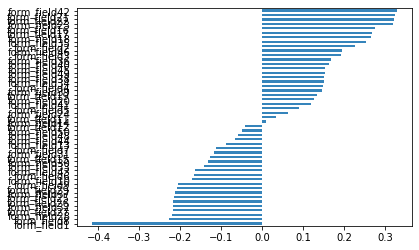

In [7]:
tst = train.corr()['default_status'].copy()
tst = tst.drop('default_status')
tst.sort_values(inplace=True)
tst.plot(kind='barh', alpha = 0.9)

In [8]:
tst


form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field29   -0.209252
form_field9    -0.206441
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field31   -0.118339
form_field7    -0.113481
form_field13   -0.089314
form_field44   -0.066595
form_field48   -0.060161
form_field50   -0.049732
form_field12   -0.042858
form_field14    0.008272
form_field11    0.033700
form_field24    0.064261
form_field5     0.088912
form_field41    0.118484
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field40    0.164199
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138


In [9]:
#Making a copy of the training and test data
df_test= test.copy() 
df_train= train.copy()

In [10]:
#drop applicant_ID and Default_status
df_train = df_train.drop(['Applicant_ID'], axis =1)
df_test= df_test.drop(['Applicant_ID'],axis =1)

In [11]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field40      78.087500
form_field31      70.371429
form_field41      68.266071
form_field11      56.108929
form_field45      55.923214
form_field23      50.219643
form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field8       23.857143
form_field6       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field32       9.732143
form_field37       9.732143
form_field25       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2

In [12]:
#drop MRG because it contains a single Unique value
#drop ZONE1 and ZONE2 because it contains too much missing values
df_train.drop(['form_field40','form_field31','form_field41'], axis =1, inplace = True)
df_test.drop(['form_field40','form_field31','form_field41'], axis =1, inplace = True)

In [13]:
df_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [14]:
### Filling Missing Values

In [15]:
train.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,...,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
0,Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,...,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,0
1,Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,...,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,0
2,Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,...,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,1
3,Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,...,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,0
4,Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,...,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,0


In [16]:
#check percentage of null values
((df_train.isna().sum()*100)/len(df_train)).sort_values(ascending=False)


form_field11      56.108929
form_field45      55.923214
form_field23      50.219643
form_field30      45.551786
form_field35      41.335714
form_field15      40.133929
form_field48      37.301786
form_field22      36.428571
form_field46      28.400000
form_field21      28.310714
form_field6       23.857143
form_field8       23.857143
form_field24      23.744643
form_field16      23.278571
form_field17      19.912500
form_field50      19.742857
form_field18      18.575000
form_field12      17.669643
form_field27      16.605357
form_field9       14.300000
form_field26      13.282143
form_field13      10.516071
form_field37       9.732143
form_field32       9.732143
form_field25       9.732143
form_field44       9.612500
form_field7        9.219643
form_field39       7.519643
form_field2        6.864286
form_field1        4.516071
form_field36       3.562500
form_field42       2.362500
form_field33       2.242857
form_field43       1.014286
form_field38       0.633929
form_field4        0

In [17]:
df_train.dtypes

form_field1       float64
form_field2       float64
form_field3       float64
form_field4       float64
form_field5       float64
form_field6       float64
form_field7       float64
form_field8       float64
form_field9       float64
form_field10      float64
form_field11      float64
form_field12      float64
form_field13      float64
form_field14        int64
form_field15      float64
form_field16      float64
form_field17      float64
form_field18      float64
form_field19      float64
form_field20      float64
form_field21      float64
form_field22      float64
form_field23      float64
form_field24      float64
form_field25      float64
form_field26      float64
form_field27      float64
form_field28      float64
form_field29      float64
form_field30      float64
form_field32      float64
form_field33      float64
form_field34      float64
form_field35      float64
form_field36      float64
form_field37      float64
form_field38      float64
form_field39      float64
form_field42

In [18]:
# convert form_field14 from interger to float
df_train['form_field14'] = df_train['form_field14'].astype(float)

In [19]:
### Outlier Identification
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

form_field1       2.620000e+02
form_field2       6.487250e-01
form_field3       1.282000e+00
form_field4       0.000000e+00
form_field5       0.000000e+00
form_field6       5.119240e+05
form_field7       6.306857e+06
form_field8       3.558572e+06
form_field9       1.557702e+07
form_field10      1.281094e+07
form_field11      1.747582e+06
form_field12      3.084381e+06
form_field13      5.401460e+06
form_field14      3.161092e+07
form_field15      9.279712e+07
form_field16      0.000000e+00
form_field17      0.000000e+00
form_field18      0.000000e+00
form_field19      1.000000e+00
form_field20      1.000000e+00
form_field21      8.958750e+01
form_field22      1.028550e+04
form_field23      1.048285e+04
form_field24      9.984750e+01
form_field25      2.286000e+03
form_field26      1.077000e+04
form_field27      6.632000e+03
form_field28      6.071200e+04
form_field29      1.204500e+04
form_field30      5.414000e+03
form_field32      1.138000e+03
form_field33      1.883320e+01
form_fie

In [20]:
# identifying outlier skewness


df_skew= pd.DataFrame({'test':df_test.skew(), 'train':df_train.skew()})
df_skew

,test,train
default_status,NaN,1.186399
form_field1,0.106462,0.120458
form_field10,7.712529,18.007423
form_field11,11.127970,9.633062
form_field12,7.248238,4.734462
form_field13,26.590741,53.667658
form_field14,87.269522,118.547478
form_field15,7.152106,5.533132
form_field16,3.762989,3.999875
form_field17,3.877657,5.044450


In [21]:
df_train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field39,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,...,51789.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04,56000.000000
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,...,0.090849,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05,0.244911
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,...,0.423802,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06,0.430038
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,...,0.000000,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02,0.000000
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,...,0.000000,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01,0.000000
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552e+07,1.326101e+07,...,0.000000,0.628573,10.100000,0.753840,0.000000,0.000000,1.153022e+03,1.181754,4.993370e-01,0.000000
max,3900.000000,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,...,21.000000,2.200000,91.910000,0.800000,5.000000,5.000000,5.321014e+07,28.000000,2.307571e+08,1.000000


In [22]:


df_train['form_field13']= df_train['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0) 
df_test['form_field13']= df_test['form_field13'].apply(lambda i: np.log(i) if i > 0 else 0)

df_train['form_field24']= df_train['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0) 
df_test['form_field24']= df_test['form_field24'].apply(lambda i: np.log(i) if i > 0 else 0)

df_train['form_field48']= df_train['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0) 
df_test['form_field48']= df_test['form_field48'].apply(lambda i: np.log(i) if i > 0 else 0)

df_train['form_field50']= df_train['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0) 
df_test['form_field50']= df_test['form_field50'].apply(lambda i: np.log(i) if i > 0 else 0)








In [23]:
df_skew= pd.DataFrame({'test':df_test.skew(), 'train':df_train.skew()})
df_skew

,test,train
default_status,NaN,1.186399
form_field1,0.106462,0.120458
form_field10,7.712529,18.007423
form_field11,11.127970,9.633062
form_field12,7.248238,4.734462
form_field13,-0.921511,-0.901013
form_field14,87.269522,118.547478
form_field15,7.152106,5.533132
form_field16,3.762989,3.999875
form_field17,3.877657,5.044450


In [24]:
tst = df_train.corr()['default_status'].copy()
tst= tst.drop('default_status')
tst.sort_values(inplace=True)
tst

form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field13   -0.211036
form_field29   -0.209252
form_field9    -0.206441
form_field48   -0.172157
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field7    -0.113481
form_field50   -0.110695
form_field44   -0.066595
form_field12   -0.042858
form_field24   -0.000940
form_field14    0.008272
form_field11    0.033700
form_field5     0.088912
form_field20    0.127612
form_field19    0.134433
form_field39    0.145949
form_field4     0.147548
form_field34    0.151109
form_field38    0.151966
form_field49    0.152407
form_field45    0.154638
form_field36    0.167306
form_field3     0.193603
form_field46    0.196138
form_field2     0.226313
form_field35    0.254479
form_field18    0.265692


In [25]:
df_train.form_field47.nunique()
df_train.form_field47.head()

#Return the column namesn with object datatype
obj_dtype= df_train.select_dtypes(include=['object']).columns
obj_dtype

#Encode all categorical variables
df_train =pd.get_dummies(df_train, columns= obj_dtype)
df_test = pd.get_dummies(df_test, columns= obj_dtype)
df_train.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,2.02,0.711632,0.0,0.0,0.000000,1.129518,-3.115984,0,1,0
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,8.08,0.183584,NaN,0.0,5.857378,1.620483,-1.131850,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,NaN,956940.0,NaN,192944.0,1079864.0,...,18.18,0.791136,0.0,0.0,0.000000,1.513370,-4.453336,1,1,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,2.02,0.685168,NaN,0.0,4.499144,0.664452,-2.492190,0,1,0
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,12.12,0.438168,0.0,0.0,4.583819,1.427891,-3.087193,0,1,0


In [26]:
#fill NA with mean() of each column in  dataset
df_train1 = df_train.copy()
df_test1 = df_test.copy()


df_train1 = df_train1.apply(lambda x: x.fillna(x.median()),axis=0)
df_test1 = df_test1.apply(lambda x: x.fillna(x.median()),axis=0)

df_ = pd.DataFrame({'test':df_test1.isna().sum(), 'train':df_train1.isna().sum()})
df_


,test,train
default_status,NaN,0
form_field1,0.0,0
form_field10,0.0,0
form_field11,0.0,0
form_field12,0.0,0
form_field13,0.0,0
form_field14,0.0,0
form_field15,0.0,0
form_field16,0.0,0
form_field17,0.0,0


In [27]:
# binarize colum 14 into 3 categories- Poor,average, rich

df_train1['form_field14']= pd.qcut(df_train1['form_field14'],3, labels = ['poor','avg','rich'])
df_test1['form_field14']= pd.qcut(df_test1['form_field14'],3, labels = ['poor','avg','rich'])
df_train1['form_field14']

0        rich
1         avg
2        poor
3        rich
4         avg
         ... 
55995    rich
55996    poor
55997    poor
55998    rich
55999    poor
Name: form_field14, Length: 56000, dtype: category
Categories (3, object): [poor < avg < rich]

In [28]:

#Encode all categorical variables
df_train1 =pd.get_dummies(df_train1, columns=['form_field14'], )
df_test1 = pd.get_dummies(df_test1, columns= ['form_field14'],   )
df_train1.head()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,...,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field47_lending,form_field14_poor,form_field14_avg,form_field14_rich
0,3436.0,0.28505,1.6560,0.0,0.000,0.0,10689720.0,252072.0,4272776.0,11333126.0,...,0.0,0.000000,1.129518,-3.115984,0,1,0,0,0,1
1,3456.0,0.67400,0.2342,0.0,0.000,0.0,898979.0,497531.0,9073814.0,2533168.0,...,0.0,5.857378,1.620483,-1.131850,0,1,0,0,1,0
2,3276.0,0.53845,3.1510,0.0,6.282,115533.0,956940.0,963942.0,192944.0,1079864.0,...,0.0,0.000000,1.513370,-4.453336,1,1,0,1,0,0
3,3372.0,0.17005,0.5050,0.0,0.000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,...,0.0,4.499144,0.664452,-2.492190,0,1,0,0,0,1
4,3370.0,0.77270,1.1010,0.0,0.000,1556.0,214728.0,214728.0,1284089.0,361770.0,...,0.0,4.583819,1.427891,-3.087193,0,1,0,0,1,0


In [29]:
tst1 = df_train1.corr()['default_status'].copy()
tst1= tst1.drop('default_status')
tst1.sort_values(inplace=True)
tst1

form_field1            -0.402483
form_field47_lending   -0.227926
form_field8            -0.221136
form_field28           -0.219289
form_field32           -0.215621
form_field13           -0.211036
form_field9            -0.209977
form_field37           -0.208794
form_field29           -0.208564
form_field25           -0.207944
form_field26           -0.206425
form_field27           -0.202047
form_field48           -0.172157
form_field10           -0.169665
form_field6            -0.166398
form_field43           -0.164295
form_field33           -0.140002
form_field14_rich      -0.118804
form_field7            -0.114472
form_field50           -0.110695
form_field15           -0.104998
form_field30           -0.088812
form_field12           -0.067367
form_field44           -0.057371
form_field24           -0.000940
form_field14_avg       -0.000506
form_field45            0.041735
form_field11            0.079239
form_field5             0.088699
form_field14_poor       0.114987
form_field

In [30]:
col1 = tst[tst <0]

print(col1)

form_field1    -0.414826
form_field8    -0.227655
form_field28   -0.220421
form_field27   -0.218191
form_field32   -0.218091
form_field26   -0.218068
form_field25   -0.215165
form_field37   -0.213527
form_field13   -0.211036
form_field29   -0.209252
form_field9    -0.206441
form_field48   -0.172157
form_field10   -0.170323
form_field6    -0.165438
form_field43   -0.165155
form_field33   -0.140934
form_field30   -0.132381
form_field15   -0.127264
form_field7    -0.113481
form_field50   -0.110695
form_field44   -0.066595
form_field12   -0.042858
form_field24   -0.000940
Name: default_status, dtype: float64


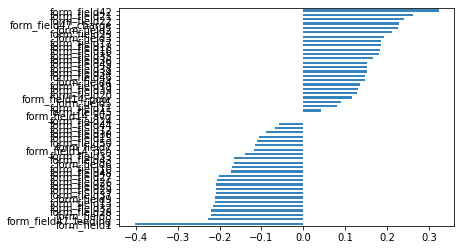

In [31]:
tst2 = df_train1.corr()['default_status'].copy()
tst2 = tst2.drop('default_status')
tst2.sort_values(inplace=True)
tst2.plot(kind='barh', alpha = 0.9)

In [32]:
tst2.sort_values(inplace=True)

tst2

form_field1            -0.402483
form_field47_lending   -0.227926
form_field8            -0.221136
form_field28           -0.219289
form_field32           -0.215621
form_field13           -0.211036
form_field9            -0.209977
form_field37           -0.208794
form_field29           -0.208564
form_field25           -0.207944
form_field26           -0.206425
form_field27           -0.202047
form_field48           -0.172157
form_field10           -0.169665
form_field6            -0.166398
form_field43           -0.164295
form_field33           -0.140002
form_field14_rich      -0.118804
form_field7            -0.114472
form_field50           -0.110695
form_field15           -0.104998
form_field30           -0.088812
form_field12           -0.067367
form_field44           -0.057371
form_field24           -0.000940
form_field14_avg       -0.000506
form_field45            0.041735
form_field11            0.079239
form_field5             0.088699
form_field14_poor       0.114987
form_field

In [33]:
df_test1.columns

Index(['form_field1', 'form_field2', 'form_field3', 'form_field4',
       'form_field5', 'form_field6', 'form_field7', 'form_field8',
       'form_field9', 'form_field10', 'form_field11', 'form_field12',
       'form_field13', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field32', 'form_field33', 'form_field34',
       'form_field35', 'form_field36', 'form_field37', 'form_field38',
       'form_field39', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field48', 'form_field49',
       'form_field50', 'form_field47_charge', 'form_field47_lending',
       'form_field14_poor', 'form_field14_avg', 'form_field14_rich'],
      dtype='object')

In [34]:
df_train1 = df_train1.drop(['form_field1','form_field14_rich','form_field47_lending'],1)
df_test1 = df_test1.drop(['form_field1', 'form_field14_rich','form_field47_lending'],1)

In [35]:
df_train1.describe()

,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,...,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,default_status,form_field47_charge,form_field14_poor,form_field14_avg
count,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,0.531300,1.045948,0.846578,1.943915,5.030354e+05,6.481592e+06,2.230006e+06,1.206553e+07,1.180420e+07,1.293838e+06,...,0.565806,0.031964,0.068286,3.882073,1.042410,-1.284647,0.244911,0.649518,0.395482,0.271339
std,0.795529,2.142391,3.148393,10.480172,1.269466e+06,1.826393e+07,3.499505e+06,1.850582e+07,2.661770e+07,3.323671e+06,...,0.187415,0.196615,0.286885,4.004734,1.802351,3.237953,0.430038,0.477125,0.488958,0.444655
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.048528,0.000000,0.000000,-2.338893,0.000000,-23.366219,0.000000,0.000000,0.000000,0.000000
25%,0.080150,0.000000,0.000000,0.000000,3.501000e+04,8.145660e+05,3.294830e+05,1.831315e+06,4.609650e+05,6.986440e+05,...,0.428256,0.000000,0.000000,0.000000,0.000000,-2.696787,0.000000,0.000000,0.000000,0.000000
50%,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,...,0.588648,0.000000,0.000000,3.939860,0.000000,-1.245438,0.000000,1.000000,0.000000,0.000000
75%,0.675700,1.270800,0.000000,0.000000,3.023502e+05,6.335740e+06,2.361230e+06,1.403308e+07,1.315909e+07,6.986440e+05,...,0.739474,0.000000,0.000000,6.233810,1.158480,0.000000,0.000000,1.000000,1.000000,1.000000
max,18.015050,57.371600,91.672200,407.748600,5.313546e+07,2.158794e+09,1.037397e+08,3.200533e+08,2.191361e+09,1.707430e+08,...,0.800000,5.000000,5.000000,17.789760,28.000000,19.256876,1.000000,1.000000,1.000000,1.000000


In [36]:
df_train1.columns

Index(['form_field2', 'form_field3', 'form_field4', 'form_field5',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field11', 'form_field12', 'form_field13',
       'form_field15', 'form_field16', 'form_field17', 'form_field18',
       'form_field19', 'form_field20', 'form_field21', 'form_field22',
       'form_field23', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50',
       'default_status', 'form_field47_charge', 'form_field14_poor',
       'form_field14_avg'],
      dtype='object')

In [37]:
df_test1.columns

Index(['form_field2', 'form_field3', 'form_field4', 'form_field5',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field11', 'form_field12', 'form_field13',
       'form_field15', 'form_field16', 'form_field17', 'form_field18',
       'form_field19', 'form_field20', 'form_field21', 'form_field22',
       'form_field23', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50',
       'form_field47_charge', 'form_field14_poor', 'form_field14_avg'],
      dtype='object')

## Modelling

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier



In [39]:
X = df_train1.drop('default_status', axis = 1)
y = df_train1['default_status']


# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.80, random_state = 1234)

#Observing the dimension
X_train.shape, y_train.shape, X_test.shape, y_test.shape



((11200, 47), (11200,), (44800, 47), (44800,))

In [40]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



In [41]:
#A simple loop to help pick an algorithm

seed = 7
models = []
models.append(('Lr', LogisticRegression()))
models.append(('RFA', RandomForestClassifier()))
models.append(('gbm', GradientBoostingClassifier()))
models.append(('Decision_Tree', DecisionTreeClassifier()))
models.append(('xgb', XGBClassifier(n_estimators = 50)))
models.append(('Catboost', CatBoostClassifier(silent = True)))
models.append(('LGBM', LGBMClassifier(silent = True)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
    model.fit(X_train, y_train)
    score = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
    results.append(score)
    names.append(name)
    msg = "%s: %f " % (name, score)
    print(msg)

Lr: 0.825242 
RFA: 0.822147 
gbm: 0.827661 
Decision_Tree: 0.630061 
xgb: 0.813607 
Catboost: 0.828720 
LGBM: 0.821831 


In [42]:
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss

error_list = []
test_pred = []

fold = StratifiedKFold(n_splits = 6)
i=1
for train_index, test_index in fold.split(X,y):
    
    #cross validation
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model = CatBoostClassifier(learning_rate =0.1,
                               depth = 5,
                               n_estimators = 1000,
                               random_seed =1234,
                               use_best_model = True,
                               eval_metric = 'AUC')
    model.fit(X_train, y_train, eval_set =[(X_train, y_train), (X_test, y_test)],
              early_stopping_rounds =400,
              verbose =100)
    preds = model.predict(X_test)
    print("err:", roc_auc_score(y_test,preds))
    error_list.append(roc_auc_score(y_test,preds))
    
    # Predicting on the test set
    test_pred_cbr = model.predict_proba(df_test1)[:,1]
    #predict on the test set for submission

df_cbr= {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred_cbr}
sub = pd.DataFrame(data=df_cbr)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('suqcut50CVcbrmed1nodrop_k=6.csv', index = False)

0:	test: 0.7784199	test1: 0.7810068	best: 0.7810068 (0)	total: 60.5ms	remaining: 1m
100:	test: 0.8448098	test1: 0.8262015	best: 0.8262015 (100)	total: 4.4s	remaining: 39.2s
200:	test: 0.8572788	test1: 0.8282396	best: 0.8282566 (189)	total: 8.45s	remaining: 33.6s
300:	test: 0.8678171	test1: 0.8290497	best: 0.8290497 (300)	total: 13.2s	remaining: 30.6s
400:	test: 0.8768141	test1: 0.8288387	best: 0.8291922 (320)	total: 17.3s	remaining: 25.8s
500:	test: 0.8849733	test1: 0.8281551	best: 0.8291922 (320)	total: 21.3s	remaining: 21.2s
600:	test: 0.8921915	test1: 0.8273924	best: 0.8291922 (320)	total: 25.4s	remaining: 16.9s
700:	test: 0.8987501	test1: 0.8263041	best: 0.8291922 (320)	total: 29.5s	remaining: 12.6s
Stopped by overfitting detector  (400 iterations wait)

bestTest = 0.8291921884
bestIteration = 320

Shrink model to first 321 iterations.
err: 0.680419629725626
0:	test: 0.7825623	test1: 0.7763800	best: 0.7763800 (0)	total: 119ms	remaining: 1m 58s
100:	test: 0.8428845	test1: 0.8390334	

In [43]:
df_train1.columns

Index(['form_field2', 'form_field3', 'form_field4', 'form_field5',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field11', 'form_field12', 'form_field13',
       'form_field15', 'form_field16', 'form_field17', 'form_field18',
       'form_field19', 'form_field20', 'form_field21', 'form_field22',
       'form_field23', 'form_field24', 'form_field25', 'form_field26',
       'form_field27', 'form_field28', 'form_field29', 'form_field30',
       'form_field32', 'form_field33', 'form_field34', 'form_field35',
       'form_field36', 'form_field37', 'form_field38', 'form_field39',
       'form_field42', 'form_field43', 'form_field44', 'form_field45',
       'form_field46', 'form_field48', 'form_field49', 'form_field50',
       'default_status', 'form_field47_charge', 'form_field14_poor',
       'form_field14_avg'],
      dtype='object')

In [44]:
feature = (['form_field2', 'form_field3', 'form_field4', 'form_field5',
       'form_field6', 'form_field7', 'form_field8', 'form_field9',
       'form_field10', 'form_field11', 'form_field12', 'form_field13',
       'form_field14', 'form_field15', 'form_field16', 'form_field17',
       'form_field18', 'form_field19', 'form_field20', 'form_field21',
       'form_field22', 'form_field23', 'form_field24', 'form_field25',
       'form_field26', 'form_field27', 'form_field28', 'form_field29',
       'form_field30', 'form_field32', 'form_field33', 'form_field34',
       'form_field35', 'form_field36', 'form_field37', 'form_field38',
       'form_field39', 'form_field42', 'form_field43', 'form_field44',
       'form_field45', 'form_field46', 'form_field48', 'form_field49',
       'form_field50', 'form_field47_charge',
       'form_field47_lending'])
feature_importance_df = pd.DataFrame(model.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = df_train1[feature].columns

plt.figure(figsize=(20, 12));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(50))
plt.title('CatboostClassifier features importance (top 50):')

KeyError: "['form_field47_lending', 'form_field14'] not in index"

In [ ]:
gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
score = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score ))

# Predicting on the test set
test_pred = gbm.predict(test_new) #predict on the test set for submission

df = {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred}
sub = pd.DataFrame(data=df)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissiongbm.csv', index = False)

In [ ]:
cbr = CatBoostClassifier()
parameters = {'iterations'    : [90,100,120],                           
              'loss_function' : ['Logloss'],
              'eval_metric'   : ['AUC']}

cbr_grid = GridSearchCV(estimator=cbr, param_grid = parameters, cv = 3, n_jobs=-1)
cbr_grid.fit(X_train, y_train)   


print(cbr_grid.best_params_)

In [ ]:
#'verbose': [True], 'random_state': [42], 'max_bin':[50,100, 150], 'scale_pos_weight':[50,100]

In [ ]:
cbr = CatBoostClassifier(depth = 6,
                         learning_rate = 0.05 ,
                         iterations = 100,
                         eval_metric = 'AUC',
                         )

#categorical_features_indices = np.where(train_new.dtypes != np.float)[0]

                         
cbr.fit(X_train, y_train,  eval_set = (X_test, y_test), plot=True)

#Calculate AUC
score = roc_auc_score(y_test, cbr.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score))

# Predicting on the test set
test_pred_cbr = cbr.predict_proba(df_test1)[:,1] #predict on the test set for submission

df_cbr= {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred_cbr}
sub = pd.DataFrame(data=df_cbr)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissioncbrmed_1.csv', index = False)

In [ ]:
categorical_features_indices = np.where(train_new.dtypes != np.float)[0]
categorical_features_indices

In [ ]:
'n_estimators':range(20,81,20)
'max_depth':range(5,16,3),
'min_samples_split':range(200,1001,200),
'min_samples_leaf':range(20,71,10),
'max_features':range(7,20,2),
'subsample':[0.6,0.7,0.8,0.9]}


In [ ]:
### Fine tunning Parameters


In [ ]:

param_test1 = {'n_estimators':range(20,81,20),
               'max_depth':range(5,16,3),
               'min_samples_split':range(200,1001,200),
               'min_samples_leaf':range(20,71,10),
               'max_features':range(7,20,2),
               'subsample':[0.6,0.7,0.8,0.9]}
               
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(random_state=10), 
                        param_grid = param_test1, 
                        scoring='roc_auc',
                        n_jobs=4,
                        iid=False,
                        cv=5)

gsearch1.fit(X_train,y_train)

In [ ]:
print(gsearch1.best_score_)
print(gsearch1.best_params_)

In [ ]:
gbm = GradientBoostingClassifier(learning_rate=0.9, n_estimators= 20,
                                 max_depth =5, min_samples_split = 800,
                                 min_samples_leaf = 30, random_state=10,
                                 max_features = 9, subsample = 0.7)

gbm.fit(X_train, y_train)
score = roc_auc_score(y_test, gbm.predict_proba(X_test)[:,1])
print('score_metric: {a} '.format(a = score ))

# Predicting on the test set
test_pred = gbm.predict(test_new) #predict on the test set for submission

df = {'Applicant_ID': test['Applicant_ID'], 'default_status': test_pred}
sub = pd.DataFrame(data=df)
sub = sub[['Applicant_ID', 'default_status']]
sub.to_csv('submissiongbm.csv', index = False)

In [ ]:
train_new= df_train1.drop(['form_field1','form_field8','form_field28','form_field27',
                           'form_field32','form_field26','form_field25','form_field9','form_field37', 
                           'form_field47_lending',
                           'form_field13','form_field29','form_field9','form_field48',
                           'form_field10','form_field6','form_field43','form_field33',
                           'form_field30','form_field15','form_field7','form_field50',
                           'form_field44','form_field12','form_field24','form_field14'], axis =1)

test_new = df_test1.drop(['form_field1','form_field8','form_field28','form_field27',
                           'form_field32','form_field26','form_field25','form_field9','form_field37', 
                           'form_field47_lending',
                           'form_field13','form_field29','form_field9','form_field48',
                           'form_field10','form_field6','form_field43','form_field33',
                           'form_field30','form_field15','form_field7','form_field50',
                           'form_field44','form_field12','form_field24','form_field14'], axis =1)



In [ ]:
# create dictionary of ordinal to integer mapping
ord1= {'charge':1, 'lending':0 }

# apply using map
df_train.form_field47 = df_train.form_field47 .map(ord1)
df_test.form_field47 = df_test.form_field47.map(ord1)


df_train.form_field47.isna().sum()